In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
hour_df = pd.read_csv("hour.csv")

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Answers / comments / reasoning:**

-

## Part 2 - Data Processing and Analysis

In [4]:
# Renaming columns names to more readable names
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_situation',
                        'temp': 'temperature',
                        'atemp': 'feeling_temperature',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

#Features and Target
category_features = ['season', 'year', 'month', 'hour', 'is_holiday', 'weekday', 'is_workingday', 'weather_situation']
number_features = ['temperature', 'feeling_temperature', 'humidity', 'windspeed', 'casual', 'registered']
wine_counts.plot.bar(stacked=True)wine_counts.plot.bar(stacked=True)
features= category_features + number_features
target = ['total_count']

In [5]:
hour_df[number_features].describe(percentiles=[.1, .25, .5, .75, .95])

,temperature,feeling_temperature,humidity,windspeed,casual,registered
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.240000,0.242400,0.370000,0.000000,1.000000,7.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000
95%,0.800000,0.742400,0.930000,0.417900,138.100000,465.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000


In [6]:
#Setting proper data types of categorical features
for cat_feat in category_features:
    hour_df[cat_feat] = hour_df[cat_feat].astype('category')
hour_df[category_features].describe()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_situation
count,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,7,2,4
top,3,1,7,17,0,6,1,1
freq,4496,8734,1488,730,16879,2512,11865,11413


In [7]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_situation,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# Renaming levels of categorical features to more readable/understandable levels
hour_df['season'] = hour_df['season'].replace({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
hour_df['weather_situation'] = hour_df['weather_situation'].replace({1: 'Clear or partly cloudy', 
                                                                     2: 'Mist and Cloudy', 
                                                                     3: 'Light Snow or Light Rain', 
                                                                     4: 'Heavy Snow or Heavy Rain'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['year'] = hour_df['year'].replace({0: '2011', 1: '2012'})
hour_df['is_workingday'] = hour_df['is_workingday'].replace({0: 'Holiday or Weekend', 1: 'Workday'})
hour_df['is_holiday'] = hour_df['is_holiday'].replace({0: 'Workday', 1: 'Holiday'})

In [9]:
print(hour_df.isnull().any())

rec_id                 False
datetime               False
season                 False
year                   False
month                  False
hour                   False
is_holiday             False
weekday                False
is_workingday          False
weather_situation      False
temperature            False
feeling_temperature    False
humidity               False
windspeed              False
casual                 False
registered             False
total_count            False
dtype: bool


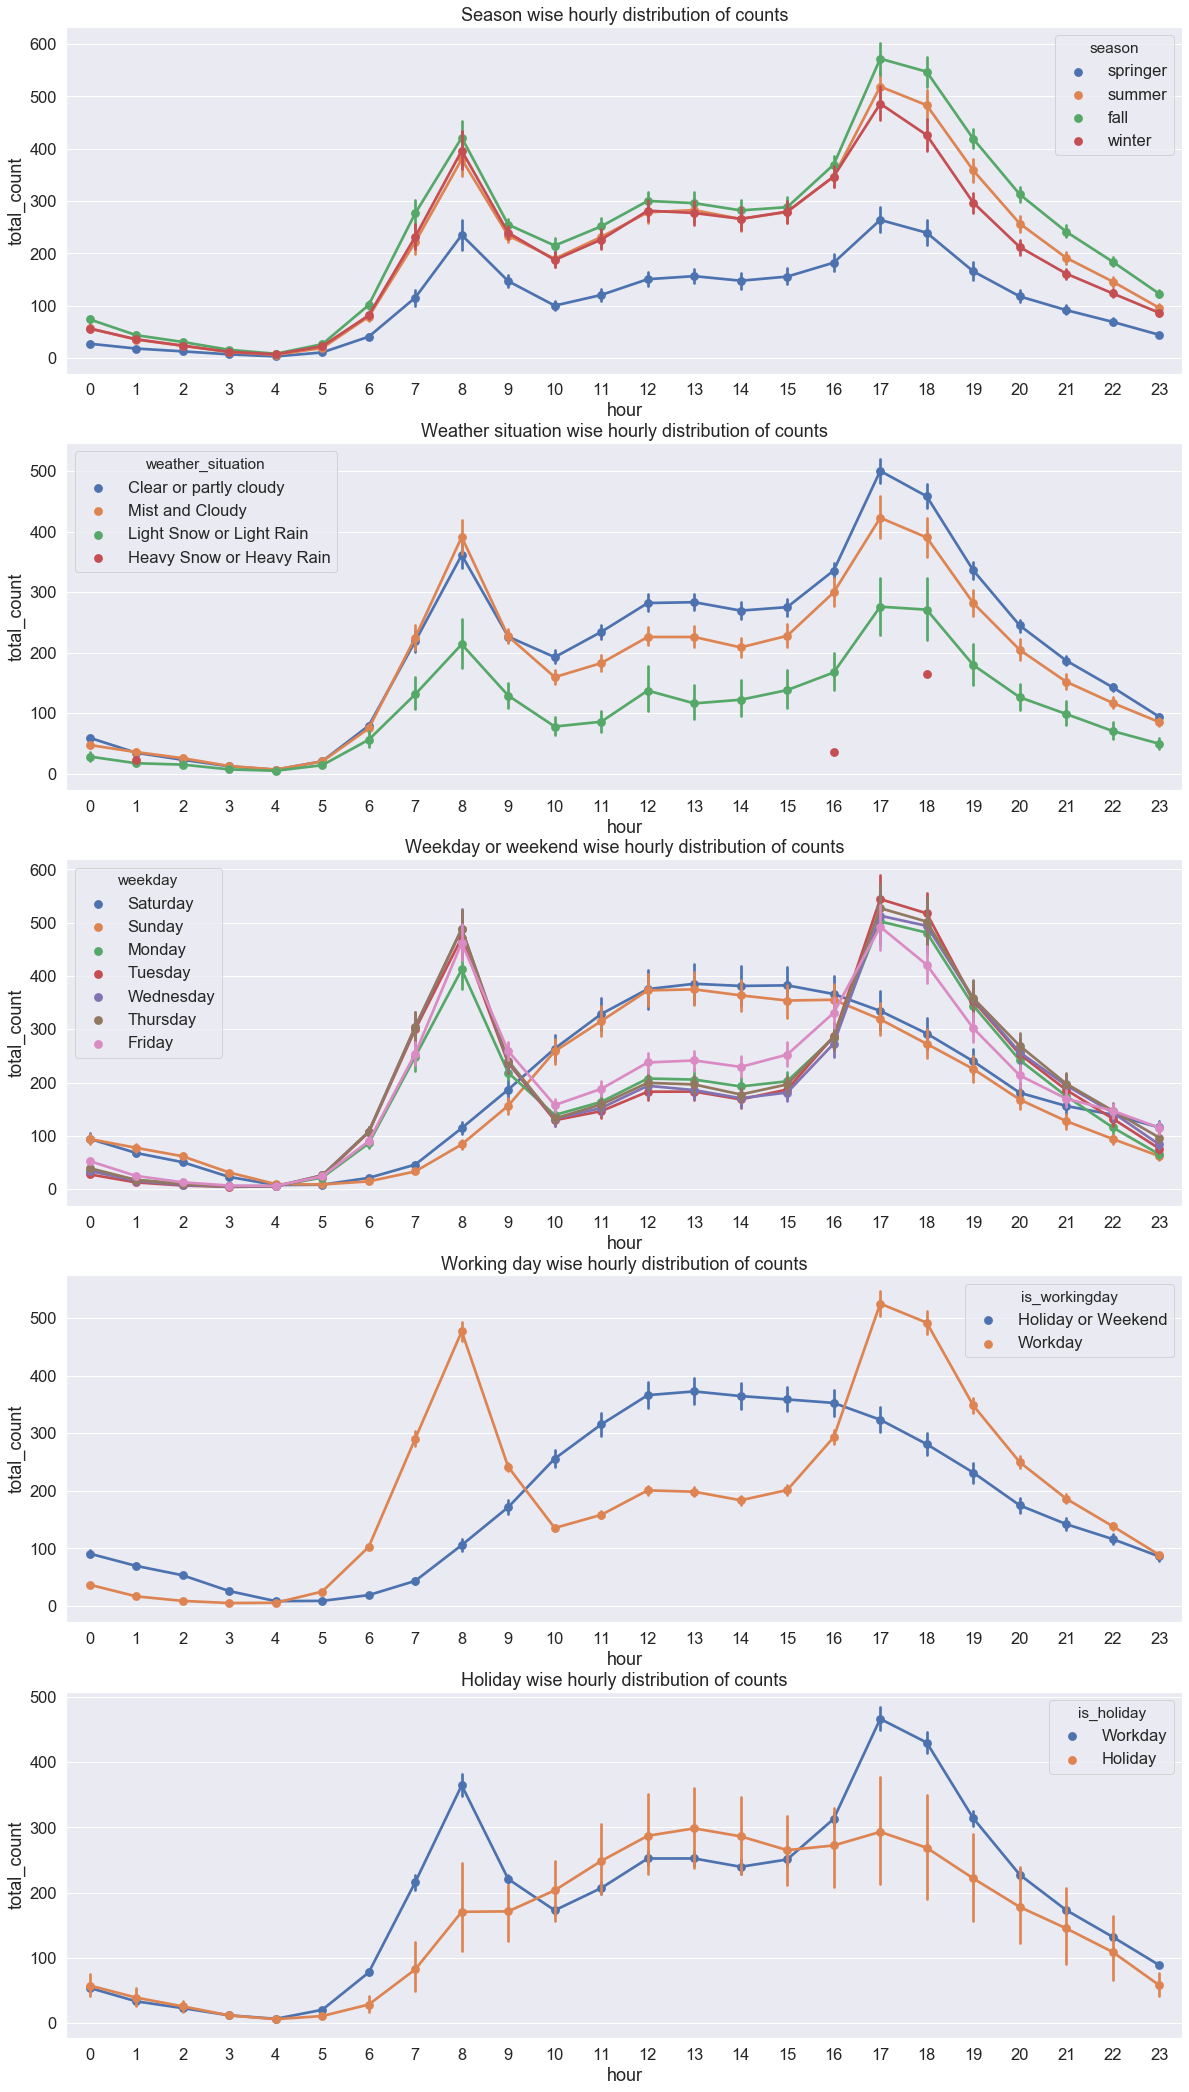

In [10]:
# Step 1 : Prepare m rows n columns Figure
sns.set(font_scale=1.5)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(20, 37)

# Step 2 : Assign subplot
# Pointplot of the average rental counts per hours by workingday, holiday, weekday, season, weather
sns.pointplot(x='hour', y='total_count', data=hour_df[['hour', 'total_count','season']], hue='season', ax=axes[0]).set(title="Season wise hourly distribution of counts")
sns.pointplot(x='hour', y='total_count', data=hour_df[['hour', 'total_count','weather_situation']], hue='weather_situation', ax=axes[1]).set(title="Weather situation wise hourly distribution of counts")
sns.pointplot(x='hour', y='total_count', data=hour_df[['hour', 'total_count','weekday']], hue='weekday', ax=axes[2]).set(title="Weekday or weekend wise hourly distribution of counts")
sns.pointplot(x='hour', y='total_count', data=hour_df[['hour', 'total_count','is_workingday']], hue='is_workingday', ax=axes[3]).set(title="Working day wise hourly distribution of counts")
sns.pointplot(x='hour', y='total_count', data=hour_df[['hour', 'total_count','is_holiday']], hue='is_holiday', ax=axes[4]).set(title="Holiday wise hourly distribution of counts")
plt.show()

**Interpretation:**
1. Bikes are hired most during fall and least during spring.
2. Count of bikes hired during summer and winter is almost same except after 17:00 hours in summer has higher bikes hired.
3. All season and weather has highest numbers of bikes hired (peak hour) at 8 AM in the morning and 5 PM in the evening on Working day. 
4. Bikes are hired most during "clear or partly cloudy" weather, lower count during "Light snow or light rain" and almost none during "heavy snow or heavy rain".
5. Before 9 AM, count of bikes hired during "Clear or partly weather" and "Mist and cloudy" are same.
6. Bikes hired during week days has common pattern with its peak at 8 AM and 5 PM.
7. Bikes hired during weekends and Holidays shares common pattern with its peak during 12 PM to 4 PM.

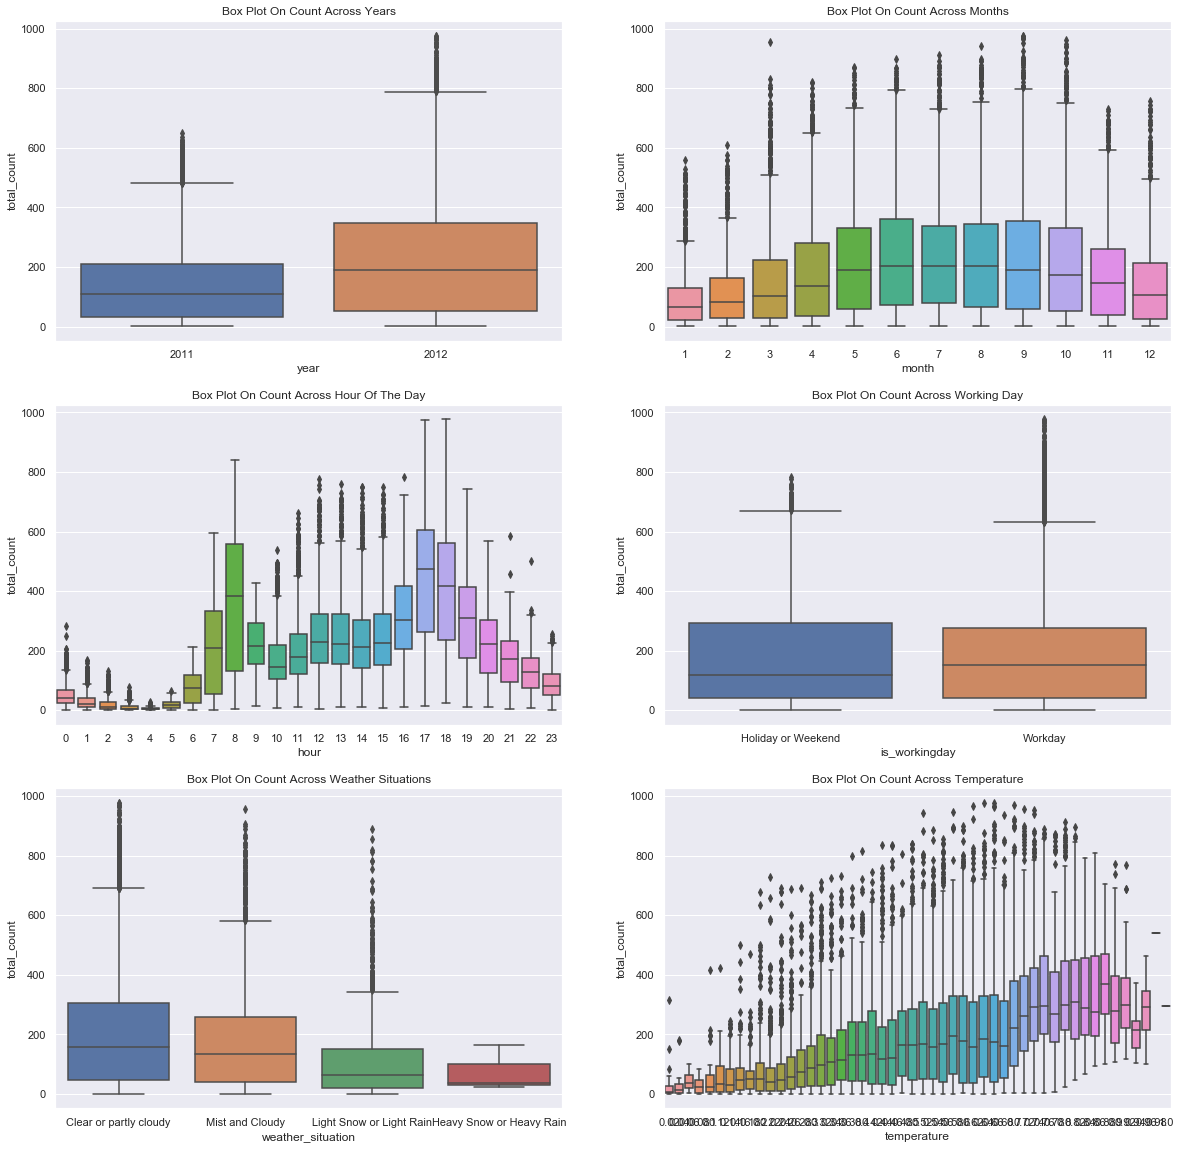

In [11]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 20)
sns.boxplot(data=hour_df,y="total_count", x="year", orient="v",ax=axes[0][0]).set(title="Box Plot On Count Across Years")
sns.boxplot(data=hour_df,y="total_count",x="month",orient="v",ax=axes[0][1]).set(title="Box Plot On Count Across Months")
sns.boxplot(data=hour_df,y="total_count",x="hour",orient="v",ax=axes[1][0]).set(title="Box Plot On Count Across Hour Of The Day")
sns.boxplot(data=hour_df,y="total_count",x="is_workingday",orient="v",ax=axes[1][1]).set(title="Box Plot On Count Across Working Day")
sns.boxplot(data=hour_df,y="total_count",x="weather_situation",orient="v",ax=axes[2][0]).set(title="Box Plot On Count Across Weather Situations")
sns.boxplot(data=hour_df,y="total_count",x="temperature",orient="v",ax=axes[2][1]).set(title="Box Plot On Count Across Temperature")
plt.show()

**Interpretation:**
1. More bikes are hired during the year 2012 incompare to 2011
2. Mean, IQR and outliers of number of bikes hired during 2012 are higher than 2011
3. The working day and holiday box plots indicate that more bikes are rented during normal working days than on weekends or holidays. 
4. The hourly box plots show a local maximum at 8 am and one at 5 pm which indicates that most users of the bike rental service use the bikes to get to work or school. 
5. Another important factor seems to be the temperature: higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data.

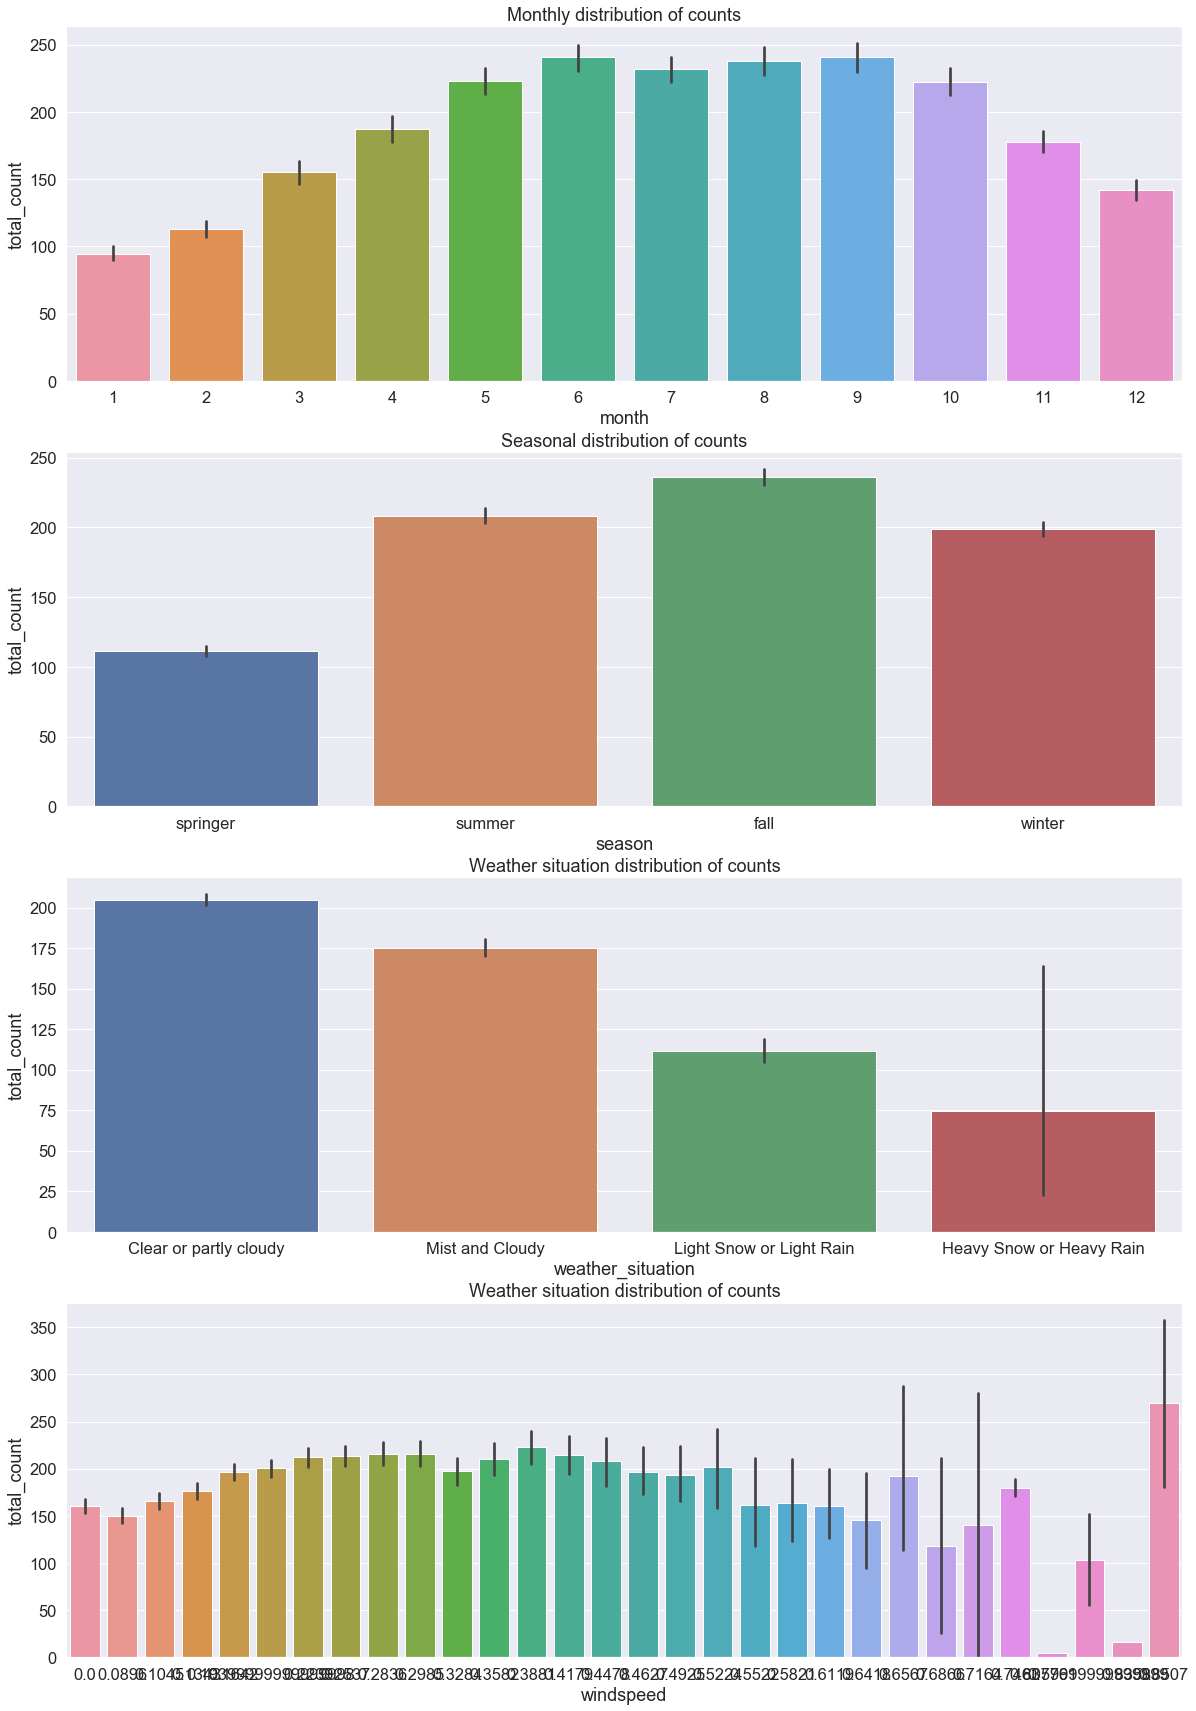

In [12]:
sns.set(font_scale=1.5)
figure, axes = plt.subplots(nrows=4)
figure.set_size_inches(20, 30)

sns.barplot(x='month', y='total_count', data=hour_df[['month','total_count']], ax=axes[0]).set(title="Monthly distribution of counts")
sns.barplot(x='season', y='total_count', data=hour_df[['season','total_count']], ax=axes[1]).set(title="Seasonal distribution of counts")
sns.barplot(x='weather_situation', y='total_count', data=hour_df[['weather_situation','total_count']], ax=axes[2]).set(title="Weather situation distribution of counts")
sns.barplot(x='windspeed', y='total_count', data=hour_df[['windspeed','total_count']], ax=axes[3]).set(title="Weather situation distribution of counts")
plt.show()

** Interpretation :**  
1. Bikes are hired most during the month of June to September, least during the month of December to February and almost same count during April to May and October to November.
2. Bikes are hired most during the Fall, least during spring and almost same count during summer and winter.
3. Another important factor seems to be the windspeed: lower to medium level windspeed lead to an increasing number of bike rents and higher windspeed not only decrease the average number of rents but also shows more outliers in the data.

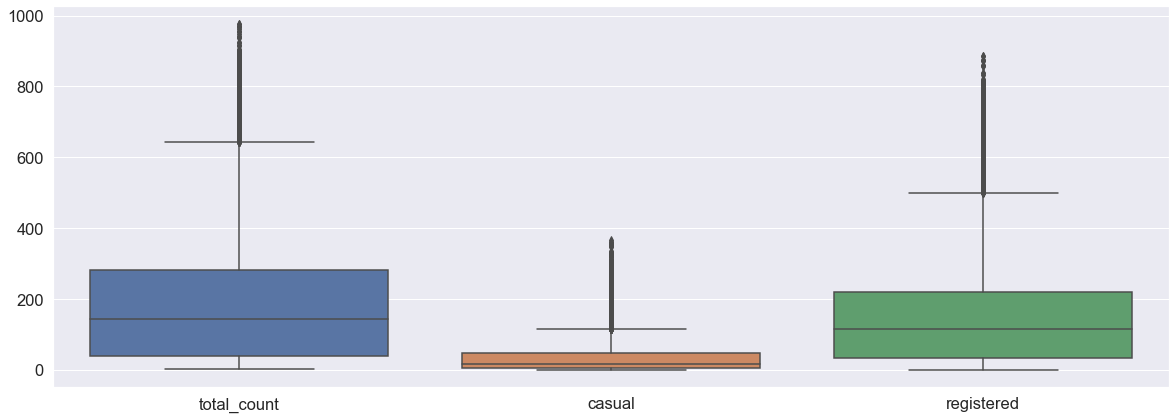

In [13]:
fig, ax = plt.subplots(figsize = (20,7))
sns.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax)
plt.show()

### Humidity

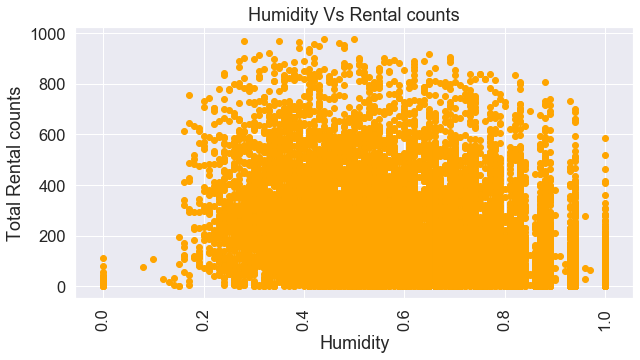

In [14]:
rcParams['figure.figsize'] = 10, 5
plt.scatter(hour_df["humidity"], hour_df["total_count"], color='orange')
plt.title("Humidity Vs Rental counts")
plt.xlabel("Humidity")
plt.xticks(rotation=90)
plt.ylabel("Total Rental counts")
plt.show()

* From the correlation matrix, there is a negative correlation witht the rental counts. 
* High humidity leads to high chances of rainfall. 
* From the plot, lower humidity leads to maximum rentals of bikes, however there is some data sparsity when humidity is towards zero.

**Windspeed**

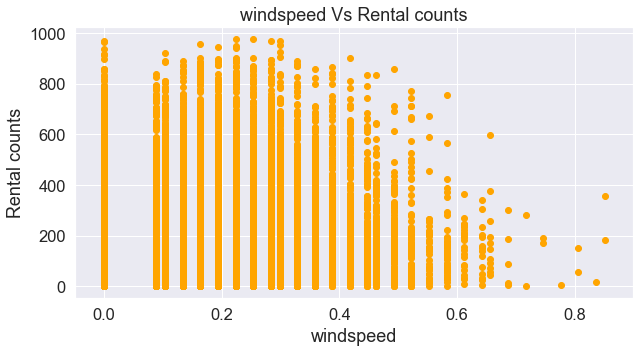

In [15]:
rcParams['figure.figsize'] = 10, 5
plt.scatter(hour_df["windspeed"], hour_df["total_count"], color='orange') 
plt.title("windspeed Vs Rental counts")
plt.xlabel("windspeed")
plt.ylabel("Rental counts")
plt.show()

* As expected, higher windspeed is not a favourable situation for renting bikes. 
* On the contrary, lower windspeed leads to pleasant/warmer weather and hence more bike rentals.

**Correlation**

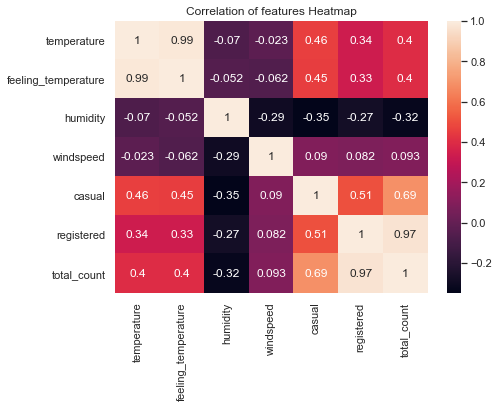

In [16]:
plt.subplots(figsize=(7,5))
sns.set(font_scale=1.0)
ax = plt.axes()
ax.set_title("Correlation of features Heatmap")
corrMatt = hour_df[['temperature',
                    'feeling_temperature', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'total_count']].corr()
sns.heatmap(corrMatt, 
            xticklabels=corrMatt.columns.values,
            yticklabels=corrMatt.columns.values,
            annot=True)
plt.show()

** Interpretation : **
1. Casual and registered contain direct information about the bike sharing total count which is to predict. Therefore, they are not considered in the feature set to prevent data leakage.
2. The variables "temperature" and "feeling_temperature" are strongly correlated. To reduce the dimensionality of the predictive model, the feature "feeling_temperature" is dismissed.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.